In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seasons = pd.read_csv('S:/Codes/March Madness Challange - Google Cloud/Mens/MDataFiles_Stage2/Data Section 1/MSeasons.csv')
TourneySeeds = pd.read_csv('S:/Codes/March Madness Challange - Google Cloud/Mens/MDataFiles_Stage2/Data Section 1/MNCAATourneySeeds.csv')
RCompResults = pd.read_csv('S:/Codes/March Madness Challange - Google Cloud/Mens/MDataFiles_Stage2/Data Section 1/MRegularSeasonCompactResults.csv')
TourneyCompResults = pd.read_csv('S:/Codes/March Madness Challange - Google Cloud/Mens/MDataFiles_Stage2/Data Section 1/MNCAATourneyCompactResults.csv')
Teams = pd.read_csv('S:/Codes/March Madness Challange - Google Cloud/Mens/MDataFiles_Stage2/Data Section 1/MTeams.csv')
TourneyDetResults = pd.read_csv('S:/Codes/March Madness Challange - Google Cloud/Mens/MDataFiles_Stage2/Data Section 1/MNCAATourneyDetailedResults.csv')

In [2]:
Teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020


In [3]:
Seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [72]:
TourneySeeds.head(3)

,Season,Seed,TeamID
0,1985,01,Georgetown
1,1985,02,Georgia Tech
2,1985,03,Illinois


In [73]:
RCompResults.head(3)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,Illinois,81,Oklahoma,64,N,0
1,1985,25,Alabama St,77,S Carolina St,70,H,0
2,1985,25,Arizona,63,Houston Bap,56,H,0


In [74]:
TourneyCompResults.tail(3)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamSeed,LTeamSeed
2248,2019,152,Texas Tech,61,Michigan St,51,N,0,04,02
2249,2019,152,Virginia,63,Auburn,62,N,0,04,05
2250,2019,154,Virginia,85,Texas Tech,77,N,1,09,03


In [10]:

for i in range(len(TourneySeeds)):
    if len(TourneySeeds['Seed'][i]) ==3:
        TourneySeeds['Seed'][i] = TourneySeeds['Seed'][i][-2:]
    elif len(TourneySeeds['Seed'][i]) ==4:
         TourneySeeds['Seed'][i] = TourneySeeds['Seed'][i][1:3]

TourneyCompResults['WTeamSeed'] = TourneyCompResults.merge(right = TourneySeeds.rename(columns = {'TeamID':'WTeamID'}),on=['Season','WTeamID'])['Seed']
TourneyCompResults['LTeamSeed'] = TourneyCompResults.merge(right = TourneySeeds.rename(columns = {'TeamID':'LTeamID'}),on=['Season','LTeamID'])['Seed']


#Lets replace TeamID with TeamNames

In [11]:
team_dictionary = pd.Series(Teams['TeamName'].values,index = Teams['TeamID'].values).to_dict()
TourneyCompResults = TourneyCompResults.replace(team_dictionary)
RCompResults = RCompResults.replace(team_dictionary)
TourneyDetResults = TourneyDetResults.replace(team_dictionary)
TourneyCompResults = TourneyCompResults.replace(team_dictionary)
TourneySeeds = TourneySeeds.replace(team_dictionary)
TourneyCompResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamSeed,LTeamSeed
0,1985,136,Arkansas,63,Iowa,54,N,0,09,08
1,1985,136,Auburn,59,Purdue,58,N,0,11,06
2,1985,136,Georgetown,68,Lehigh,43,N,0,11,16
3,1985,136,Illinois St,58,USC,55,N,0,01,08
4,1985,136,Kansas,49,Ohio,38,N,0,01,14


## Questions
### 1.Champions 2nd runnerup and 3rd runnerup for each season ?

### 2.Team won most number of titles?

### 3.Seeds assigned to Teams Analysis

### 1.Champions 2nd runnerup and 3rd runnerup for each season ?

In [13]:
def champs(start_year,end_year):
    wins = pd.crosstab(index = TourneyCompResults['WTeamID'],columns = TourneyCompResults['Season'] )
    champ = pd.DataFrame()
    for i in range(start_year,end_year):
        champ[i] = [wins[wins[i]==wins[i].max()].index[0]]
    champ = champ.transpose()
    champ.columns = ['Champions']


    runnerup_1 = pd.DataFrame()
    for i in range(start_year,end_year):
        runnerup_1[i] = [wins[wins[i]==wins[i].max()-1].index[0]]
    runnerup_1 = runnerup_1.transpose()
    bracket = pd.merge(champ,runnerup_1,left_index = True,right_index = True)
    bracket.columns = ['Champions','runnerup_1']                   
                   

    
    runnerup_2 = pd.DataFrame()
    for i in range(start_year,end_year):
        runnerup_2[i] = [wins[wins[i]==wins[i].max()-2].index[0]]
    runnerup_2 = runnerup_2.transpose()

    bracket = pd.merge(bracket,runnerup_2,left_index = True,right_index = True)
    bracket.columns = ['Champions','runnerup_1','runnerup_2']  

    runnerup_3 = pd.DataFrame()
    for i in range(start_year,end_year):
        runnerup_3[i] = [wins[wins[i]==wins[i].max()-3].index[0]]
    runnerup_3 = runnerup_3.transpose()

    bracket = pd.merge(bracket,runnerup_3,left_index = True,right_index = True)
    bracket.columns = ['Champions','runnerup_1','runnerup_2','runnerup_3']  

    runnerup_4 = pd.DataFrame()
    for i in range(start_year,end_year):
        runnerup_4[i] = [wins[wins[i]==wins[i].max()-4].index[0]]
    runnerup_4 = runnerup_4.transpose()

    bracket = pd.merge(bracket,runnerup_4,left_index = True,right_index = True)
    bracket.columns = ['Champions','runnerup_1','runnerup_2','runnerup_3','runnerup_4']  

    runnerup_5 = pd.DataFrame()
    for i in range(start_year,end_year):
        runnerup_5[i] = [wins[wins[i]==wins[i].max()-5].index[0]]
    runnerup_5 = runnerup_5.transpose()

    bracket = pd.merge(bracket,runnerup_5,left_index = True,right_index = True)
    bracket.columns = ['Champions','runnerup_1','runnerup_2','runnerup_3','runnerup_4','runnerup_5']                     

    runnerup_6 = pd.DataFrame()
    for i in range(start_year,end_year):
        runnerup_6[i] = [wins[wins[i]==wins[i].max()-6].index[0]]
    runnerup_6 = runnerup_6.transpose()

    bracket = pd.merge(bracket,runnerup_6,left_index = True,right_index = True)
    bracket.columns = ['Champions','runnerup_1','runnerup_2','runnerup_3','runnerup_4','runnerup_5','runnerup_6'] 
    return(bracket)

In [17]:
bracket.tail(10)

,Champions,runnerup_1,runnerup_2,runnerup_3,runnerup_4,runnerup_5,runnerup_6
2010,Duke,Butler,Michigan St,Baylor,Cornell,Ark Pine Bluff,Alabama
2011,Connecticut,Butler,Kentucky,Arizona,BYU,Cincinnati,Alabama
2012,Kentucky,Kansas,Louisville,Baylor,Cincinnati,BYU,Alabama
2013,Louisville,Michigan,Syracuse,Duke,Arizona,Butler,Alabama
2014,Connecticut,Kentucky,Florida,Arizona,Baylor,Cal Poly,Alabama
2015,Duke,Wisconsin,Kentucky,Arizona,Dayton,Arkansas,Alabama
2016,Villanova,North Carolina,Oklahoma,Kansas,Duke,Ark Little Rock,Alabama
2017,North Carolina,Gonzaga,Oregon,Florida,Arizona,Arkansas,Alabama
2018,Villanova,Michigan,Kansas,Duke,Clemson,Alabama,Arizona
2019,Virginia,Texas Tech,Auburn,Duke,Florida St,Arizona St,Alabama


In [16]:
#we have most number of winning titles ,now we will analyse the Matchs played by Most winning teams
#It will be very difficult to analyse the team from every aspect 

From above plot we create a performance measure for each team 

### 2.Team won most number of titles?

#### 2a.)Over The History of Tournament (1985 - 2020)

In [58]:
bracket = champs(1985,2020)
bracket.head(5)

,Champions,runnerup_1,runnerup_2,runnerup_3,runnerup_4,runnerup_5,runnerup_6
1985,Villanova,Georgetown,Memphis,Georgia Tech,Alabama,Arkansas,Arizona
1986,Louisville,Duke,Kansas,Auburn,Alabama,Ark Little Rock,Arizona
1987,Indiana,Syracuse,Providence,Georgetown,Alabama,Auburn,Arizona
1988,Kansas,Oklahoma,Arizona,Kansas St,Iowa,Auburn,Alabama
1989,Michigan,Seton Hall,Duke,Georgetown,Arizona,Arkansas,Alabama


In [53]:
top_teams_list = ['Champions']
for i in range(1,6):
    top_teams_list.append('runnerup_{}'.format(i))

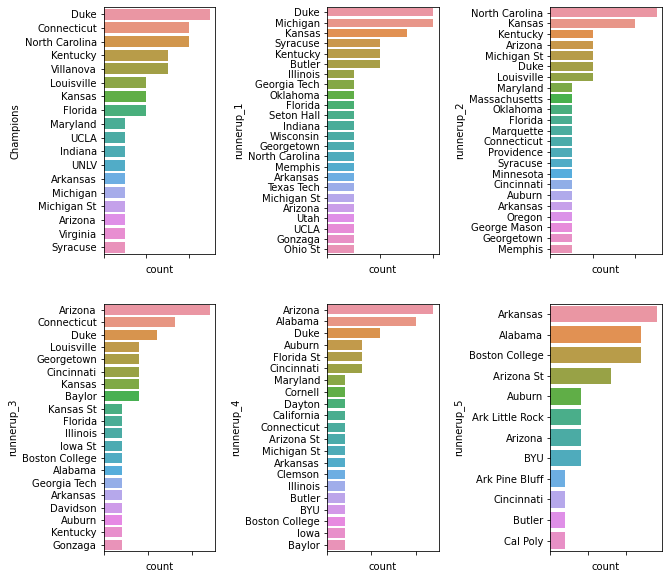

In [57]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(wspace=1)

for i,j in zip(range(1,7),top_teams_list):
    ax = fig.add_subplot(2, 3, i)
    most_wins = sns.countplot(data = bracket,y = '{}'.format(j),order = bracket['{}'.format(j)].value_counts().index,ax= ax )
    most_wins.set_xticklabels(most_wins.get_xticklabels(),rotation = 90) 

### Insights

1.)Throught the history Team Duke won most number of Championship Titles

2.)Arizona have better chances to win the championship as they mostly knockout from tournment in runnerup3,4 Positions

3.)Michigan also have better chances to win championshop as they mostly knockedout at finals.


### Team Strenght won't be same as 3 Decades Back,So it will be helpful to find present better performing Teams

#### 2b.)In Recent Decade (2009,2019)

In [71]:
recent_bracket = champs(2009,2019)
recent_bracket.head(3)

,Champions,runnerup_1,runnerup_2,runnerup_3,runnerup_4,runnerup_5,runnerup_6
2009,North Carolina,Michigan St,Connecticut,Louisville,Arizona,Arizona St,Alabama
2010,Duke,Butler,Michigan St,Baylor,Cornell,Ark Pine Bluff,Alabama
2011,Connecticut,Butler,Kentucky,Arizona,BYU,Cincinnati,Alabama


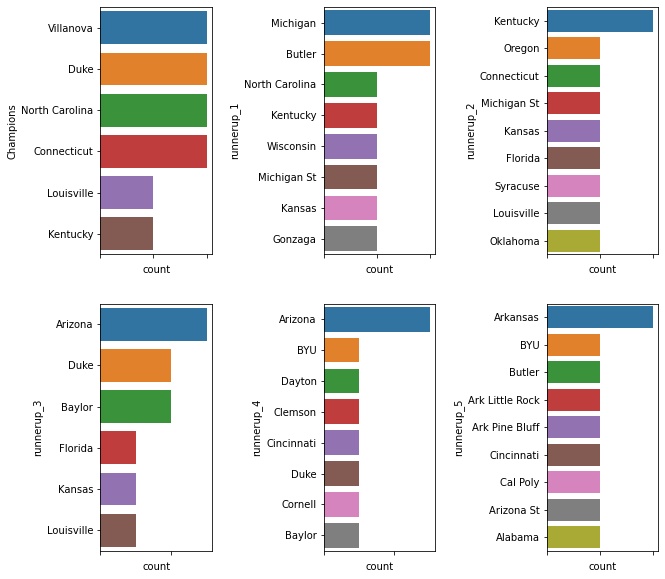

In [56]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(wspace=1)

for i,j in zip(range(1,7),top_teams_list):
    ax = fig.add_subplot(2, 3, i)
    most_wins = sns.countplot(data = recent_bracket,y = '{}'.format(j),order = recent_bracket['{}'.format(j)].value_counts().index,ax= ax )
    most_wins.set_xticklabels(most_wins.get_xticklabels(),rotation = 90) 


### Insights:

1.)Villinova started performing well in this recent time, Villinova is bagged 3 chanpionship titles in  plot 2a.).Looks like villinova done well in recent decade than past decade.

2.Duke Team Dominance is reduced in recent decade than past decade as Differet teams have nearly same number of championship titles as duke

In [ ]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(wspace=1)

for i,j in zip(range(1,7),top_teams_list):
    ax = fig.add_subplot(2, 3, i)
    most_wins = sns.countplot(data = bracket,y = '{}'.format(j),order = bracket['{}'.format(j)].value_counts().index,ax= ax )
    most_wins.set_xticklabels(most_wins.get_xticklabels(),rotation = 90) 


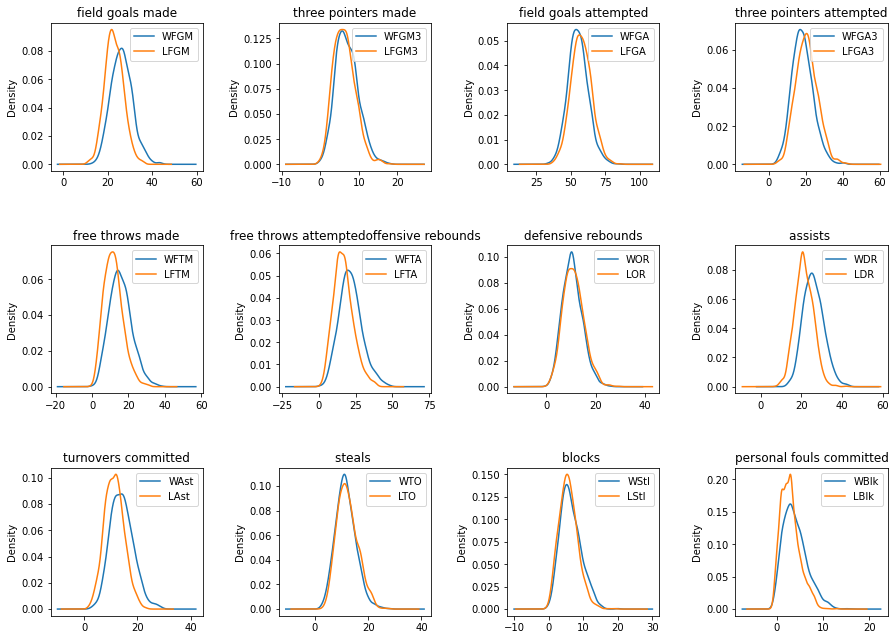

In [69]:
fig = plt.figure(figsize = (15,15))
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

x = ['WFGM','WFGM3','WFGA','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']
y = []
for i in x:
    y.append(i.replace('W','L'))

title = ['field goals made','three pointers made','field goals attempted','three pointers attempted','free throws made','free throws attempted'
        'offensive rebounds','defensive rebounds','assists ','turnovers committed','steals ','blocks ','personal fouls committed']


for i,x,y,title in zip(range(1,13),x,y,title):
    ax = fig.add_subplot(4, 4, i)
    fouls = TourneyDetResults[[x,y]].plot(kind = 'kde',ax = ax,title = title)

In [70]:
TourneySeeds.head(3)

,Season,Seed,TeamID
0,1985,01,Georgetown
1,1985,02,Georgia Tech
2,1985,03,Illinois


In [50]:
team_vs_seed = pd.crosstab(index = TourneySeeds['TeamID'],columns = TourneySeeds['Seed'])
team_vs_seed.columns = list(range(1,17))
team_vs_seed.sort_values(by =1,ascending = False)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
TeamID,,,,,,,,,,,,,,,,
Duke,14,11,5,1,1,1,0,1,0,0,0,0,0,0,0,0
North Carolina,14,7,3,2,0,3,0,3,0,0,0,0,0,0,0,0
Kansas,14,7,4,5,1,2,0,1,0,0,0,0,0,0,0,0
Kentucky,10,7,2,3,2,0,0,4,0,0,1,1,0,0,0,0
Arizona,6,7,4,3,2,2,0,2,2,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
James Madison,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
Kansas St,0,1,0,3,1,2,0,1,3,1,3,0,0,0,0,0
Kent,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0


### 3.Seeds assigned to Teams Analysis

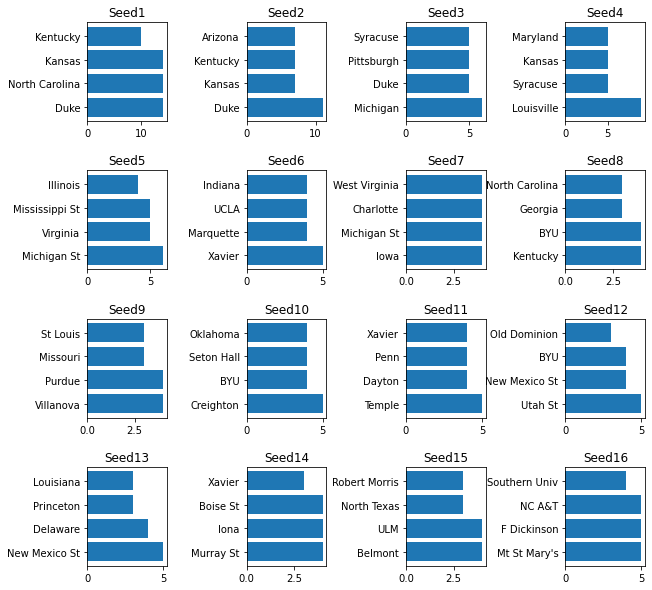

In [52]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(wspace=1)
fig.subplots_adjust(hspace=0.5)

for i in range(1,17):
    
    ax = fig.add_subplot(4, 4, i)
    langs = team_vs_seed[i].sort_values(ascending  = False)[:4].index.to_list()
    students = team_vs_seed[i].sort_values(ascending  = False)[:4].to_list()
    ax.barh(langs,students)
    ax.set_title('Seed{}'.format(i))

### 

#                                       work in progress!               